In [15]:
import seaborn as sns
import pandas as pd

rtimes=pd.read_csv('results_new.tsv', sep='\t', header=0)
rtimes["Group"] = rtimes["Data"] +"-"+ rtimes["Environment"]
rtimes['Tool'] = rtimes['Tool'].astype('category')
rtimes['Data'] = rtimes['Data'].astype('category')
rtimes['Environment'] = rtimes['Environment'].astype('category')
rtimes['Group'] = rtimes['Group'].astype('category')
rtimes

,Tool,Data,Environment,Time(s),Group
0,getorf_fa,A. thal (120 MB),PC,8.33,A. thal (120 MB)-PC
1,getorf_fa,A. thal (120 MB),HPC,14.00,A. thal (120 MB)-HPC
2,getorf_fa,Human (370 MB),PC,77.67,Human (370 MB)-PC
3,getorf_fa,Human (370 MB),HPC,85.00,Human (370 MB)-HPC
4,getorf_fa,Bac (1.5 GB),PC,254.67,Bac (1.5 GB)-PC
5,getorf_fa,Bac (1.5 GB),HPC,274.66,Bac (1.5 GB)-HPC
6,orfipy_fa,A. thal (120 MB),PC,11.00,A. thal (120 MB)-PC
7,orfipy_fa,A. thal (120 MB),HPC,6.60,A. thal (120 MB)-HPC
8,orfipy_fa,Human (370 MB),PC,42.33,Human (370 MB)-PC
9,orfipy_fa,Human (370 MB),HPC,16.66,Human (370 MB)-HPC


Text(0.5, 0, '')

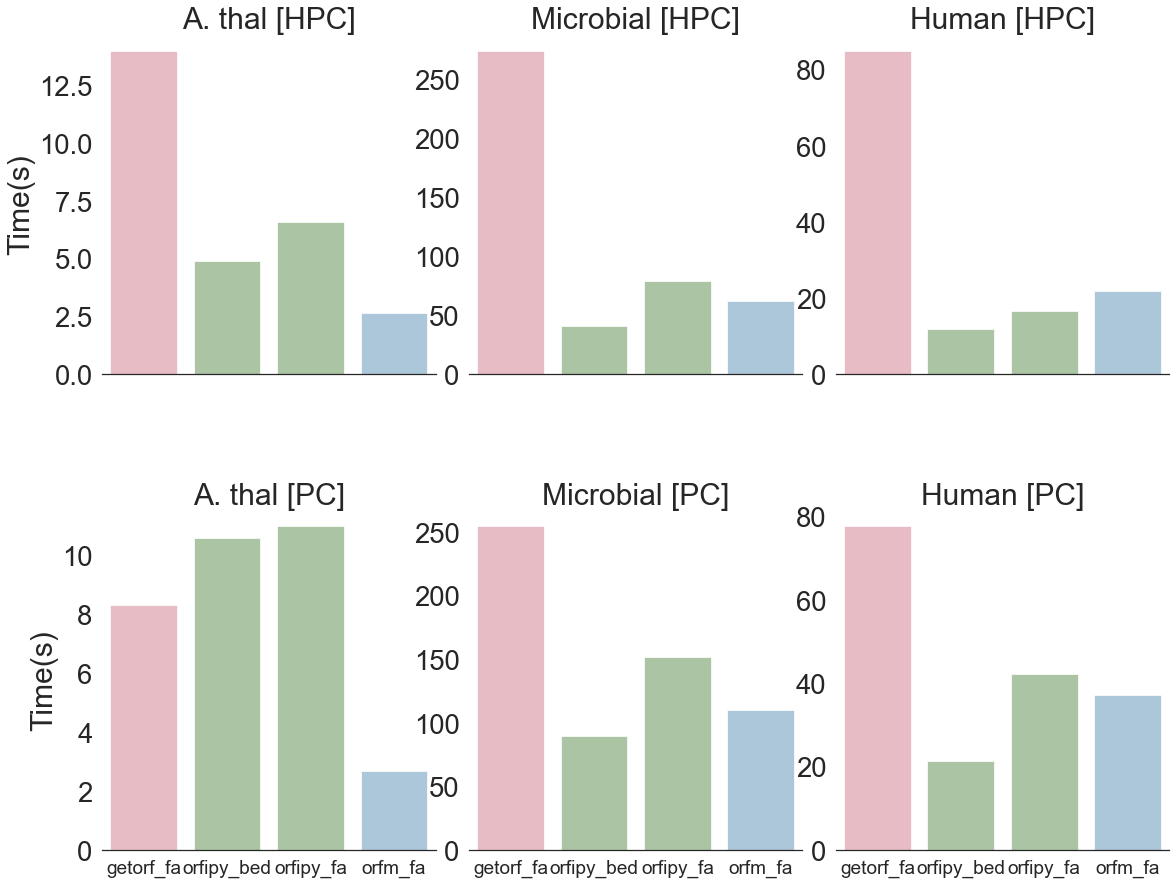

In [17]:
sns.set(font_scale=2.5,style="white")
colors = ["#ea95a7", "#84b375","#84b375","#80b2d6"]# Set your custom color palette
#sns.set_palette(sns.color_palette(colors))

g = sns.FacetGrid(rtimes, row="Environment",col="Data", hue="Tool",
                  palette=sns.color_palette(colors,desat=1),
                  sharey=False,sharex=True,legend_out=True,height=7.5, 
                  aspect=.85,gridspec_kws={"wspace":0.1,"hspace":0.4})
g.map(sns.barplot, "Tool", "Time(s)", alpha=.7,ci=None)
g.despine(left=True)
#g.add_legend()
#plt.legend(loc='upper left')


g.set_xticklabels(rotation=0,size=19)
axes = g.axes.flatten()
axes[0].set_title("A. thal [HPC]")
axes[1].set_title("Microbial [HPC]")
axes[2].set_title("Human [HPC]")
axes[3].set_title("A. thal [PC]")
axes[4].set_title("Microbial [PC]")
axes[5].set_title("Human [PC]")
for ax in axes:
    ax.set_xlabel("")
axes[4].set_xlabel("")



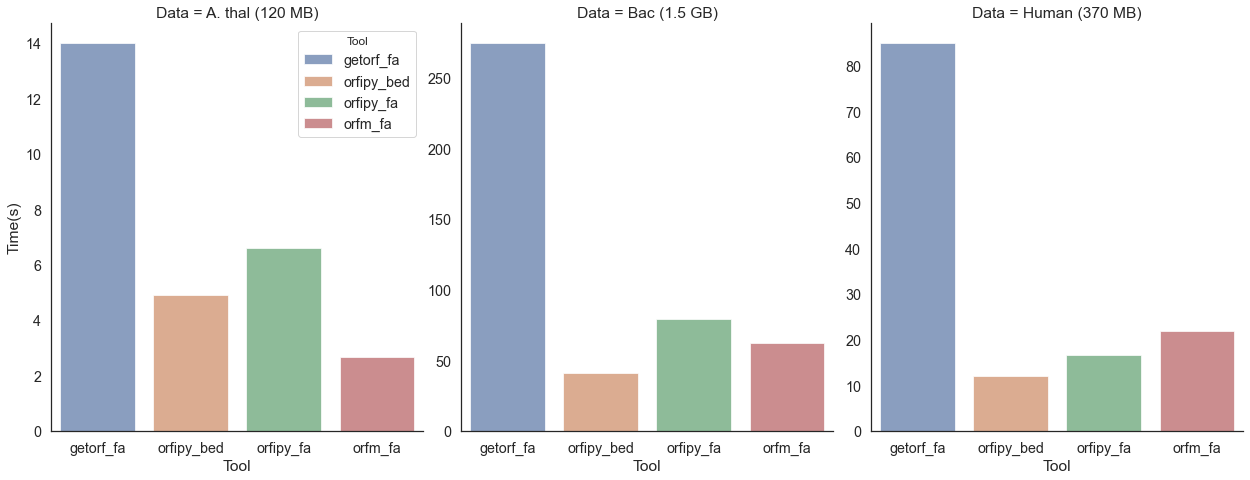

In [3]:
#create subset
#data_HPC=df.loc[df['column_name'] == some_value]
rtimes_hpc=rtimes[rtimes['Environment'] == 'HPC']
rtimes_hpc
colors = ["#ffdba9" ,"#ff95ca","#99d5ca"]
sns.set_palette(colors)

sns.set(font_scale=1.3,style="white")
g2 = sns.FacetGrid(rtimes_hpc, col="Data", hue="Tool",
                  sharey=False,legend_out=False,height=7.5, 
                  aspect=.95,gridspec_kws={"wspace":0.1,"hspace":0.1})
g2.map(sns.barplot, "Tool", "Time(s)", alpha=.7,ci=None)
g2.add_legend()